<h1 style="font-size:42px; text-align:center; margin-bottom:30px;"><span style="color:SteelBlue">Step 3:</span> Classification Algorithms</h1>
<hr>


We'll experiment with 4 algorithms to our constructed ABT:
1. $L_1$-regularized logistic regression
2. $L_2$-regularized logistic regression
3. Random forests
4. Boosted trees

In [1]:
# import libraries we need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 1. Binary classification

Simply, we are aiming for the right classification of 2 classes (employed or left).

let's take another look at the **target variable**

In [7]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the raw dataset
raw_data = pd.read_csv('project_files/employee_data.csv')
print(raw_data['status'].unique())
raw_data.status.head()

['Left' 'Employed']


0        Left
1    Employed
2    Employed
3    Employed
4    Employed
Name: status, dtype: object

In our ABT we converted the target <code style="color:crimson">'status'</code> variable from <code style="color:crimson">'Left' / 'Employed'</code> into <code style="color:crimson">1 / 0</code>.

In [8]:
# Print unique classes for 'status' and the first 5 observations for 'status' in the analytical base table
data = pd.read_csv('project_files/analytical_base_table.csv')
print(data['status'].unique())
data.status.head()

[1 0]


0    1
1    0
2    0
3    0
4    0
Name: status, dtype: int64

 By convention, the positive class is simply the primary class you're trying to identify
 We can check to see that our positive class (1) is 'Left' and our negative class (0) is 'Employed'
 
 **Note: We actually want the output to be class probabilities, instead of just a single class prediction. It is much more informative to express some level of confidence in our prediction, instead of only outputing the predicted class. **

# 2 - Noisy conditional

A model is only useful if it can accurately approximate the "true state of the world" (i.e. the "true underlying relationship" between input features and target variables).

Lets practice some **noisy conditionals**:

We'll create a synthetic dataset for which we already know the "true underlying relationship."

- We create a single input feature, x.
- Then, we generate values for the target variable, y, based on a predetermined mapping function.
- Next, we add randomly generated noise to that dataset.
- Then, We will experiment with different algorithms on our synthetic dataset- to see how they close they come.
- Finally, we compare how well models of different complexities can separate the signal from the randomly generated noise.

Our **predetermined function** for classification will be:

- If x > 0.5, then y=1.

- If x ≤ 0.5, then y=0.

Adding epsilon deviations as random noise, to turn it into a noisy conditional:

- If x+ϵ > 0.5, then y=1.

- If x+ϵ ≤ 0.5, then y=0.



In [10]:
# Creating the input feature X
x = np.linspace(0, 1, 100)
# Creating the noise
np.random.seed(0)
noise = np.random.uniform(-0.2, 0.2, 100)
# Niftly creating our target variable
y = ((x + noise) > 0.5).astype(int)

* Scikit-Learn algorithms expect input features with 2 axes, our x is a one dimensioanl array. 
* **reshaping** <code style="color:steelblue">x</code> to make sure it has 2 axes.

In [55]:
# Reshape x into X
X = x.reshape(100,1)

Visualizing our synthetic (or artificial - sounds nicer?) dataset

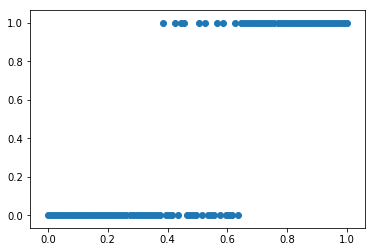

In [56]:
# Plot scatterplot of synthetic dataset
plt.scatter(X, y)

From this we can see that noise around 0.5 has . asignificant effect on our classification model.
Thus, taking real-world noise into account, we want our classification model:
- If x is closer to 0.5, we want less confidence in the prediction.
- If x is farther from 0.5, we want more confidence in the prediction.

# 3. Logistic regression

The classification analog of linear regression.

In [57]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

<code style="color:steelblue">.predict()</code> function for classification model's is 0's and 1's.

In [58]:
# predict()
logistic.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

For classification problems, to get probabilities, we use <code style="color:steelblue">.predict_proba()</code> instead of regular ol' <code style="color:steelblue">predict()</code>

In [104]:
# predict_proba() of first 10 observations
pred = logistic.predict_proba(X)[:10]

Each row has firstly the negative probability, and secondly the positive probability

In [105]:
# Class probabilities for first observation
pred[0]

array([ 0.88533224,  0.11466776])

Retrieving the probability of **just the positive class** (for the first observation)

In [106]:
# Positive class probability for first observation
pred[0][1]

0.11466776474220844

After using .predict_proba() for **binary** classification, good to use a simple list comprehension to extract a list of only the predictions for the positive class

In [107]:
# Just get the second value for each prediction
pred = [p[1] for p in pred]
pred

[0.11466776474220844,
 0.1186047048215098,
 0.12265808672793302,
 0.12683006167259706,
 0.13112273035269173,
 0.13553813543638762,
 0.14007825373198912,
 0.14474498805343122,
 0.14954015879723676,
 0.15446549524924461]

**Recap:**
Fitting and plotting the logistic regression model.

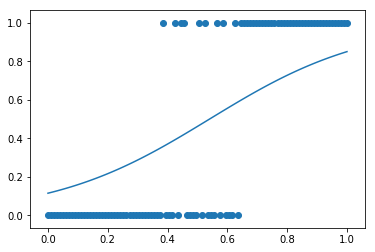

In [141]:
# Logistic regression
logistic = LogisticRegression()
logistic.fit(X, y)
# Predict probabilities
pred = logistic.predict_proba(X)

# Retrieve the second value (positive class) for each prediction
pred = [p[1] for p in pred]

# Plot dataset and predictions
plt.scatter(X, y)
plt.plot(X, pred)
plt.show()

Still not getting very high confidence for x < 0.3 and x > 0.7
It kinda looks like the model is being "too conservative."

# 4. Regularized logistic regression

To prevent overfitting we'll add regularization (that is artificially penalizing model coefficients).
- Two types of penalties.
    - L1 penalizes the absolute size of model coefficients.
    - L2 penalizes the squared size of model coefficients.

To not repeat our code, we'll write a fit_and_plot_classifier function:

In [145]:
def fit_and_plot_classifier(clf):
    # Fit model
    clf.fit(X, y)
    # Predict and take second value of each prediction
    pred = clf.predict_proba(X)
    pred = [p[1] for p in pred]
    #Plot
    plt.scatter(X, y)
    plt.scatter(X, pred)
    plt.show()
    # Return fitted model and predictions
    return clf, pred

Let's make our default Logistic Regression penalty (C = 1) **weaker** to avoid the over-generalization ("high bias") of our default logistic regression.
-  C, is the **inverse** of the regularization strength.
-  Thus, higher C means a weaker penalty and lower C means a stronger penalty.

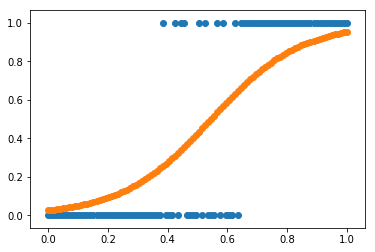

In [164]:
# More regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(C=4))

To basically remove regularization, give a very large <code style="color:steelblue">C</code> way up.

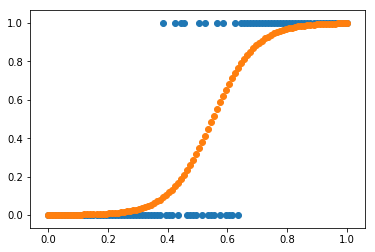

In [147]:
# Basically no regularization
clf, pred = fit_and_plot_classifier(LogisticRegression(penalty ='l1', C=1000))

The key is that for Logistic Regression, the **penalty**, or regularization is the most significant hyperparameter that you should tune.

**Penalty type:**
By default, LogisticRegression() uses the L2 penalty.

For linear regression, L2 regularization is called Ridge regression.
- For logistic regression, we'll simply call it L2-regularized logistic regression.
- **penalty = 'l1'** <-- the first character is an 'l'

For linear regression, L1 regularization was called Lasso regression.
- For logistic regression, we'll simply call it L1-regularized logistic regression.
- **penalty = 'l2'** <-- the first character is an 'l'

By default, LogisticRegression uses L2 regularization (penalty = '12')

# 5. Tree ensemble algorithms

Apply our tree ensembles for classification. 

# Random Forest

Random forests train a large number of "strong" decision trees on a random subset of both features and observations and combine their predictions through "bagging". 

Two sources of "randomness" for random forests:

1. Each decision tree is only allowed to choose from a random subset of features to split on.
2. Each decision tree is only trained on a random subset of observations (a process called resampling).


In [156]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

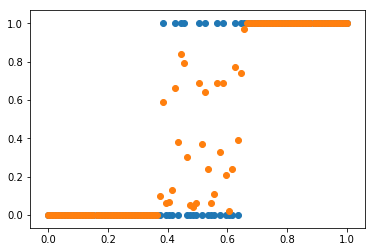

In [157]:
# Random forest classifier
forest = RandomForestClassifier(n_estimators = 100)
fit_and_plot_classifier(forest)
%clear

Seems like our random forest is overfitting the dataset.
Not surprising, since random forests are extremely complex and this dataset is extremely simple.

That said, random forests tend to perform well for real-world classification, in which our dataset is normally complex. 

**Strong random forest pro's:**

- They can be used right out of the box to beat many other models that take up to weeks to develop.
- They are the perfect "swiss-army-knife" algorithm that you can almost always rely on.
- They don't have many complicated parameters to tune.

# Boosted Trees

Boosted trees train a sequence of "weak", constrained decision trees and combine their predictions through boosting.

1. Each decision tree is allowed a maximum depth, which should be tuned.
2. Each decision tree in the sequence tries to correct the prediction errors of the one before it.


In [159]:
# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

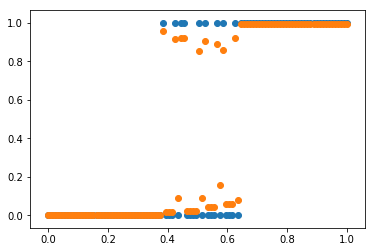

In [162]:
# Random forest classifier
boostedtrees = GradientBoostingClassifier(n_estimators=100)
fit_and_plot_classifier(boostedtrees)
%clear

Again boosted trees algorithim overfits our data, for the same reason as random forest regression.

That said, boosted trees tend to have the highest performance ceilings.
1. They often beat many other types of models after proper tuning.
2. Though it should be noted they are more complicated to tune than random forests.

That was some experimentation with different algorithms and different hyperparameters to see how they fared with our dataset.